# Proyecto - Desarrollo

## Detección de la ocupación de una oficina a partir de datos de luz, temperatura, humedad y concentración de CO2, por medio del uso de modelos estadísticos lineales.

Alejandro Mantilla - 201711304

Ximena Palacio - 201730995 

In [1]:
library(readr)
datos <- read_csv("Archivos/datos_entrenamiento.csv",
                  show_col_types = FALSE)

datos$date <- lubridate::round_date(datos$date,
           unit = "minute")

head(datos)

id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-02-11 14:48:00,21.7600,31.13333,437.3333,1029.667,0.005021011,1
2,2015-02-11 14:49:00,21.7900,31.00000,437.3333,1000.000,0.005008581,1
3,2015-02-11 14:50:00,21.7675,31.12250,434.0000,1003.750,0.005021569,1
4,2015-02-11 14:51:00,21.7675,31.12250,439.0000,1009.500,0.005021569,1
5,2015-02-11 14:52:00,21.7900,31.13333,437.3333,1005.667,0.005030298,1
6,2015-02-11 14:53:00,21.7600,31.26000,437.3333,1014.333,0.005041605,1


In [2]:
datos$date <- lubridate::round_date(datos$date,
                                    unit = "minute")

datos$DayOfWeek <- lubridate::wday(datos$date, week_start=1)
datos$WorkingDay <- as.numeric(lubridate::wday(datos$date, week_start=1) <= 5)


In [3]:
datos$HourOfDay <- lubridate::hour(datos$date)
datos$MinuteOfHour <- lubridate::minute(datos$date)


In [ ]:
datos$date <- NULL

In [4]:
head(datos)

id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,WorkingDay,HourOfDay,MinuteOfHour
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2015-02-11 14:48:00,21.7600,31.13333,437.3333,1029.667,0.005021011,1,3,1,14,48
2,2015-02-11 14:49:00,21.7900,31.00000,437.3333,1000.000,0.005008581,1,3,1,14,49
3,2015-02-11 14:50:00,21.7675,31.12250,434.0000,1003.750,0.005021569,1,3,1,14,50
4,2015-02-11 14:51:00,21.7675,31.12250,439.0000,1009.500,0.005021569,1,3,1,14,51
5,2015-02-11 14:52:00,21.7900,31.13333,437.3333,1005.667,0.005030298,1,3,1,14,52
6,2015-02-11 14:53:00,21.7600,31.26000,437.3333,1014.333,0.005041605,1,3,1,14,53


In [ ]:
pairs(datos,
      col = "#B04C7A")

In [ ]:
summary(datos)

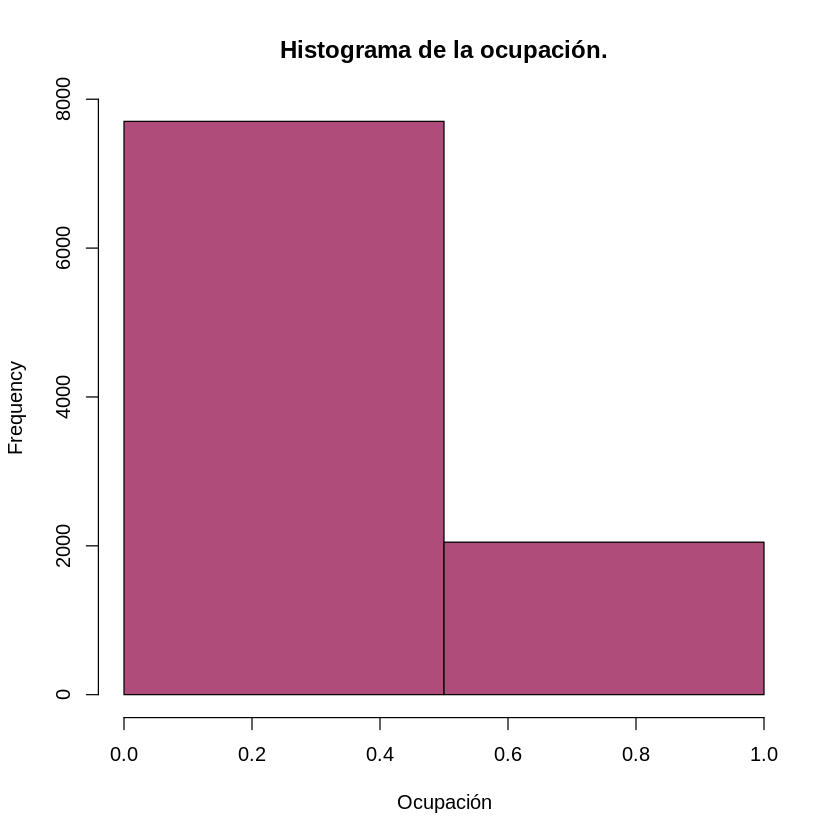

In [19]:
hist(datos$Occupancy, breaks = c(0, 0.5, 1 ),
     col = "#B04C7A",
     main = "Histograma de la ocupación.",
     xlab = "Ocupación")

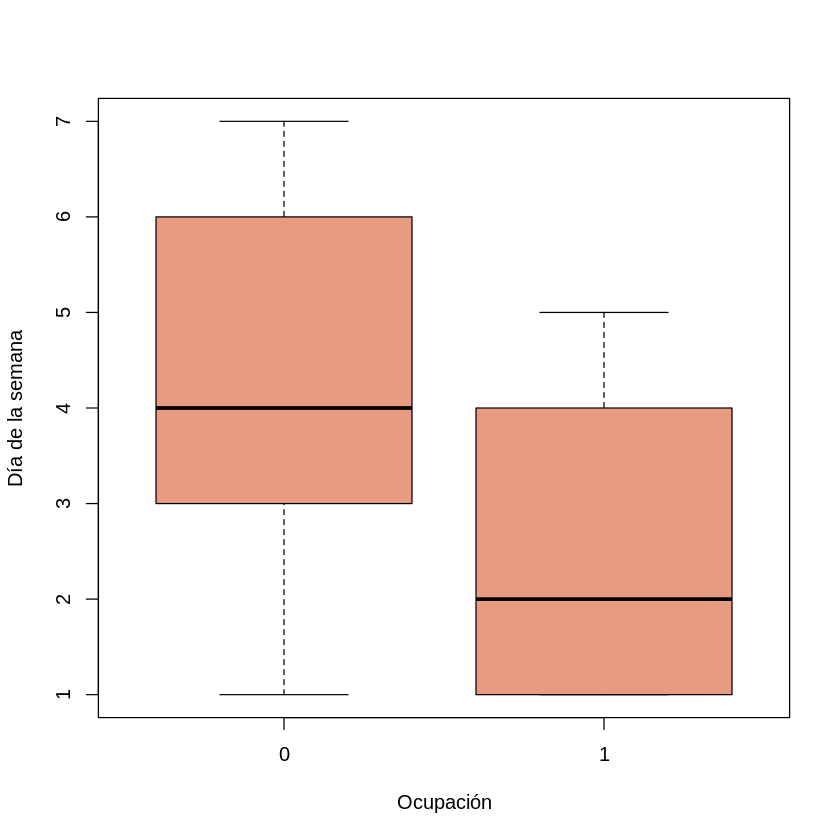

In [41]:
boxplot(datos$DayOfWeek ~ datos$Occupancy,
        ylab = "Día de la semana",
        xlab = "Ocupación",
        col = "#E79C82")

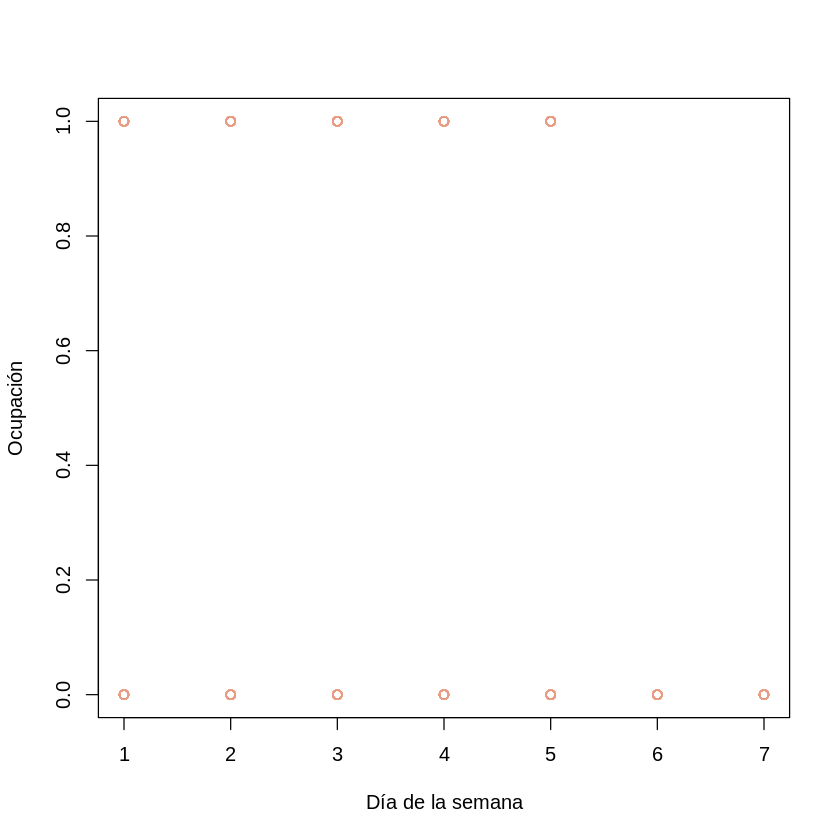

In [21]:
plot(datos$DayOfWeek,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Día de la semana",
     col = "#E79C82")

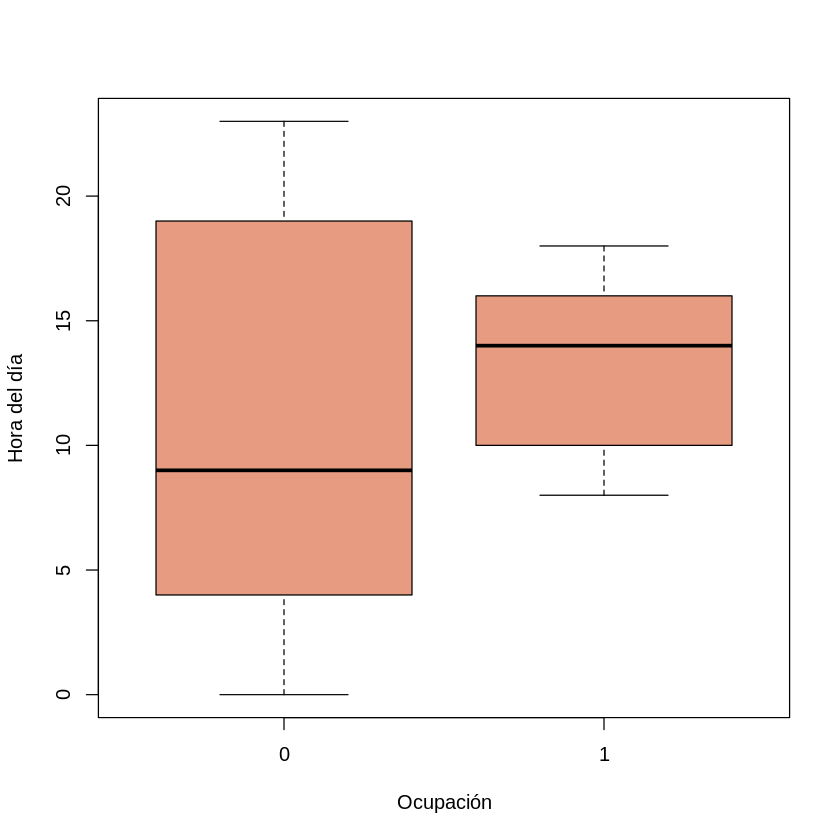

In [42]:
boxplot(datos$HourOfDay ~ datos$Occupancy,
        ylab = "Hora del día",
        xlab = "Ocupación",
        col = "#E79C82")

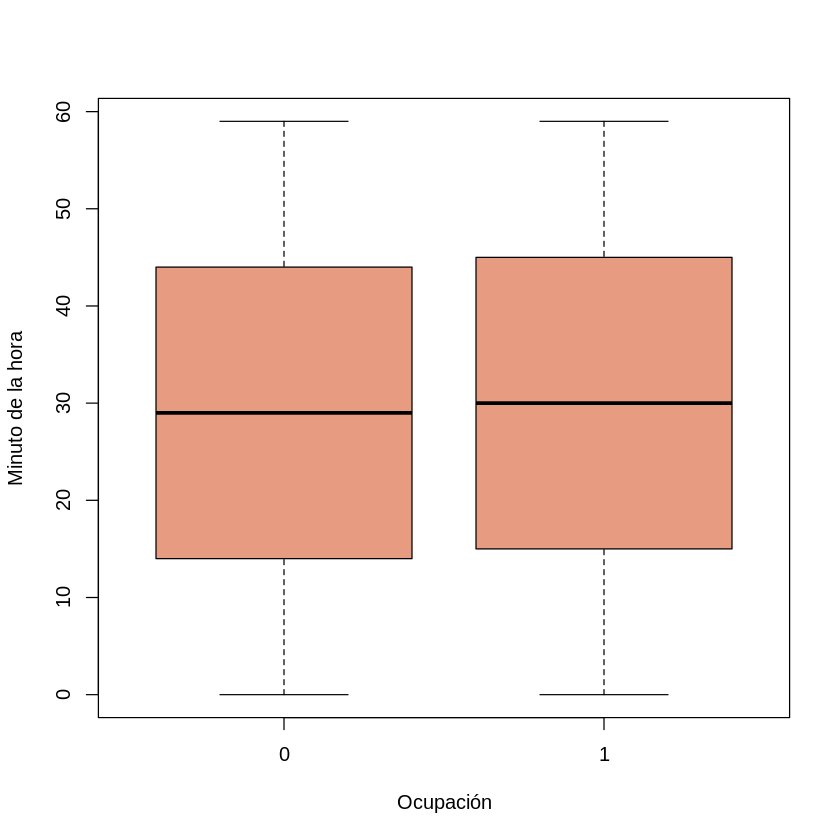

In [44]:
boxplot(datos$MinuteOfHour ~ datos$Occupancy,
        ylab = "Minuto de la hora",
        xlab = "Ocupación",
        col = "#E79C82")

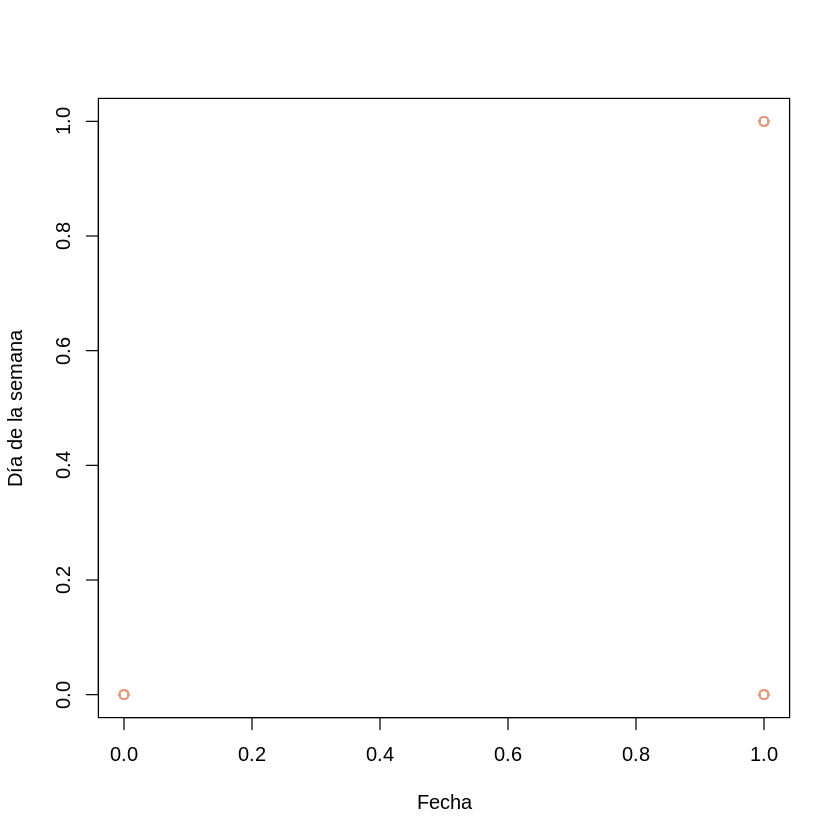

In [23]:
plot(datos$WorkingDay,
     datos$Occupancy,
     ylab = "Día de la semana",
     xlab = "Fecha",
     col = "#E79C82")

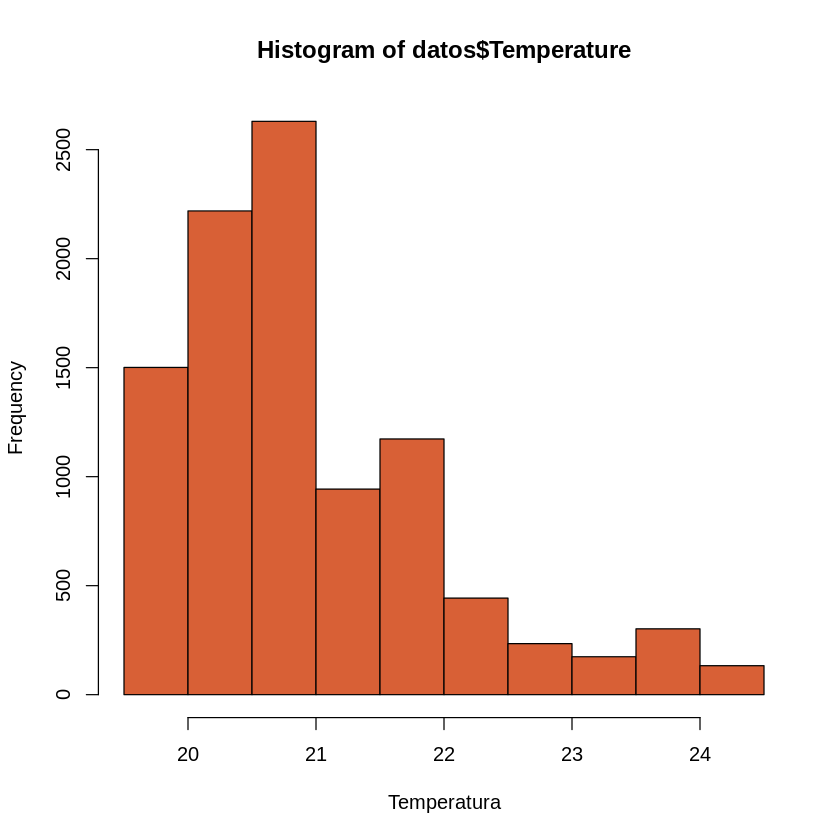

In [26]:
hist(datos$Temperature,
     xlab = "Temperatura",
     col = "#D86036")

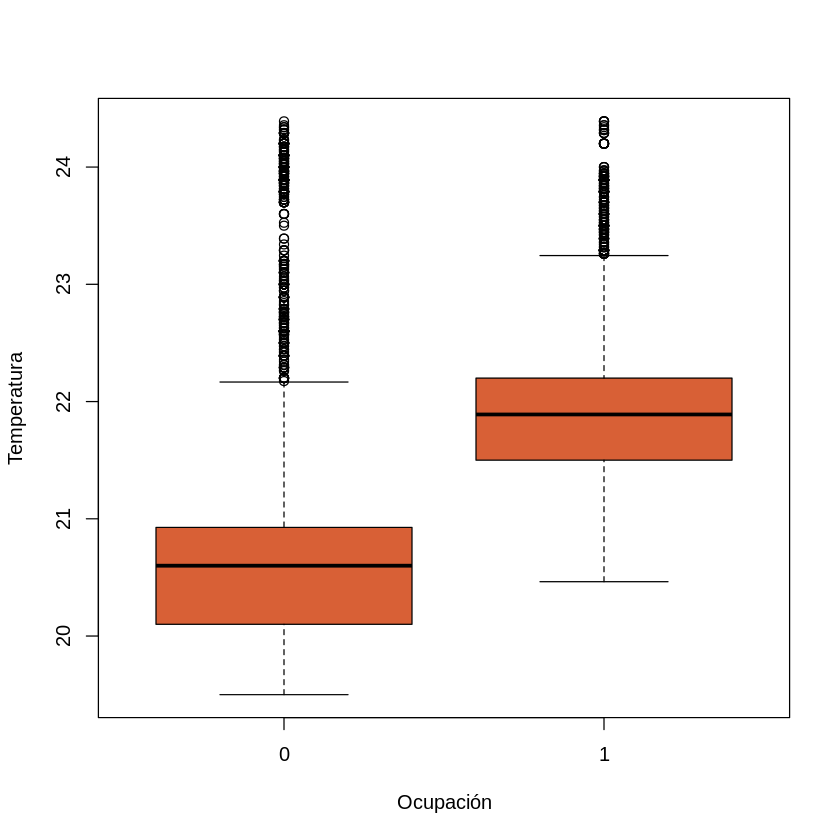

In [46]:
boxplot(datos$Temperature ~ datos$Occupancy,
        ylab = "Temperatura",
        xlab = "Ocupación",
        col = "#D86036")

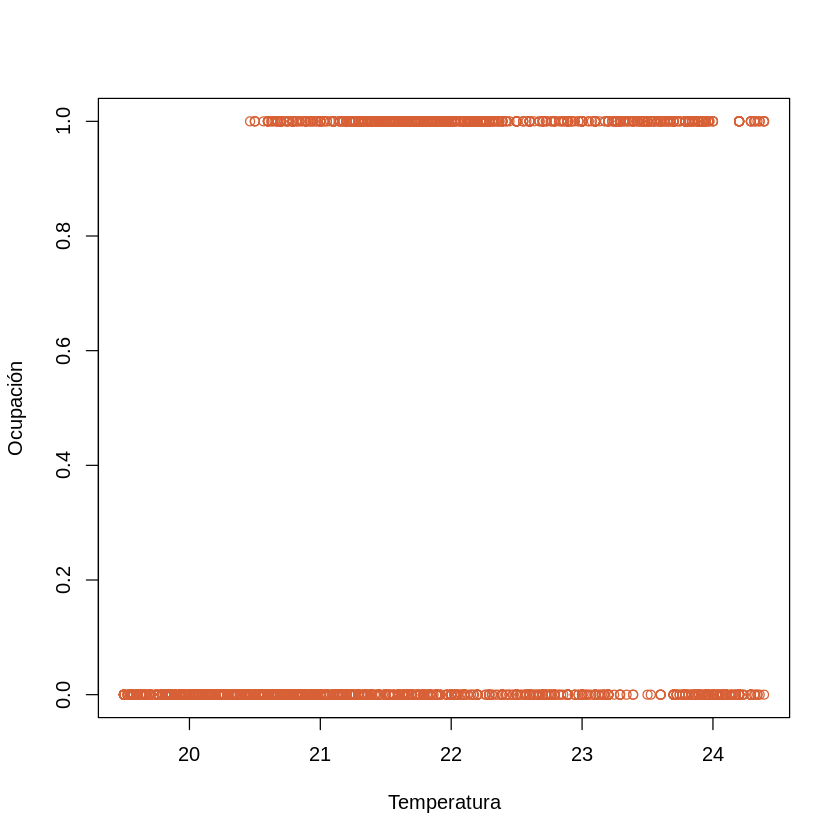

In [28]:
plot(datos$Temperature,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Temperatura",
     col = "#D86036")

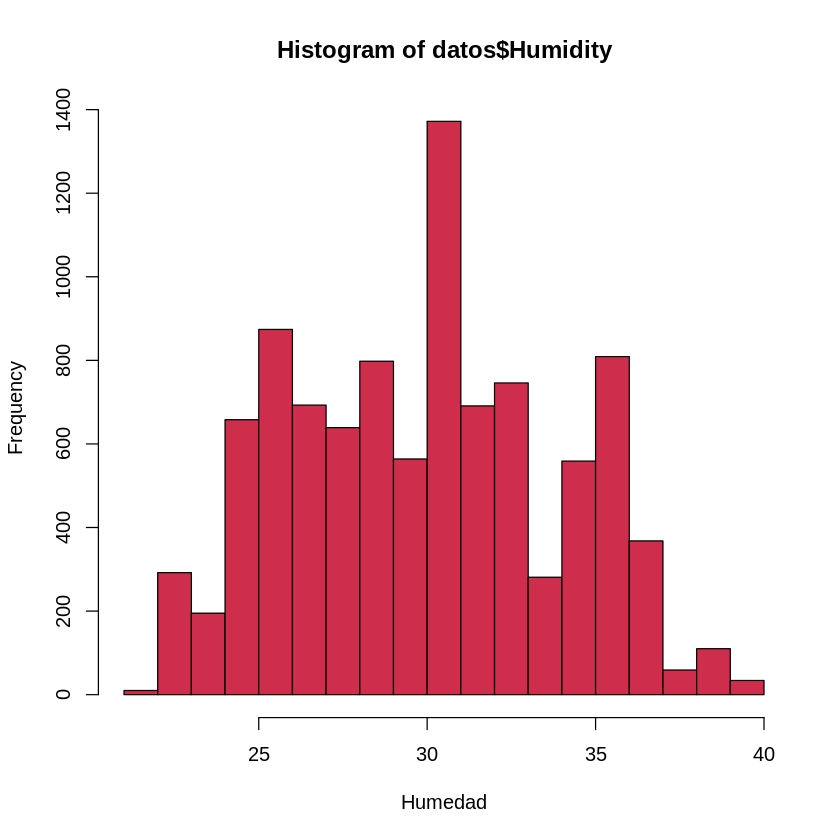

In [29]:
hist(datos$Humidity,
     xlab = "Humedad",
     col = "#CF2D4C")

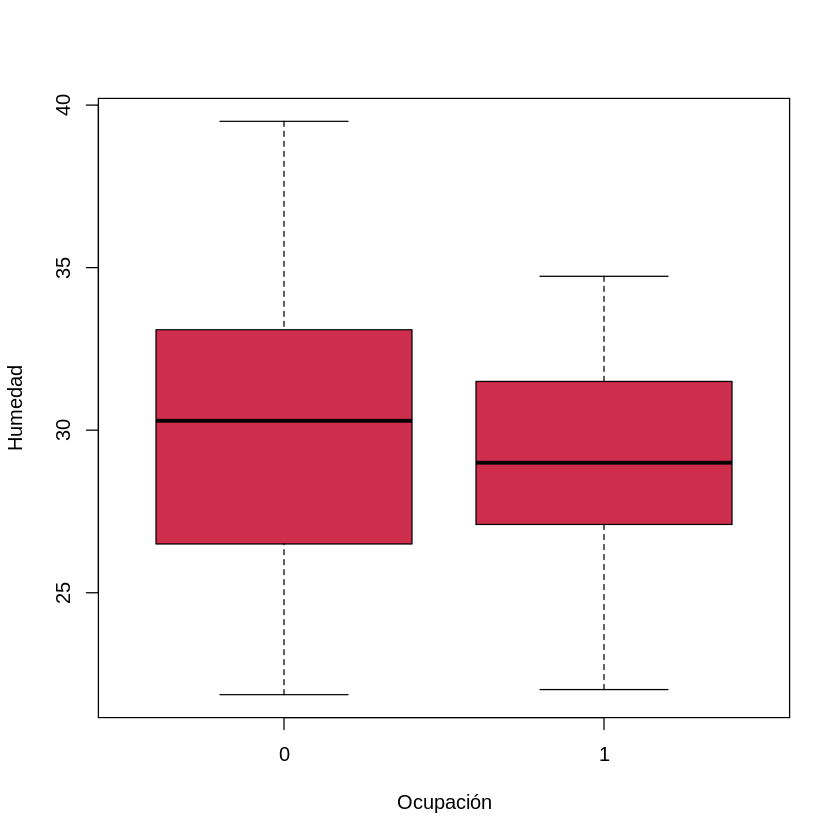

In [47]:
boxplot(datos$Humidity ~ datos$Occupancy,
        ylab = "Humedad",
        xlab = "Ocupación",
        col = "#CF2D4C")

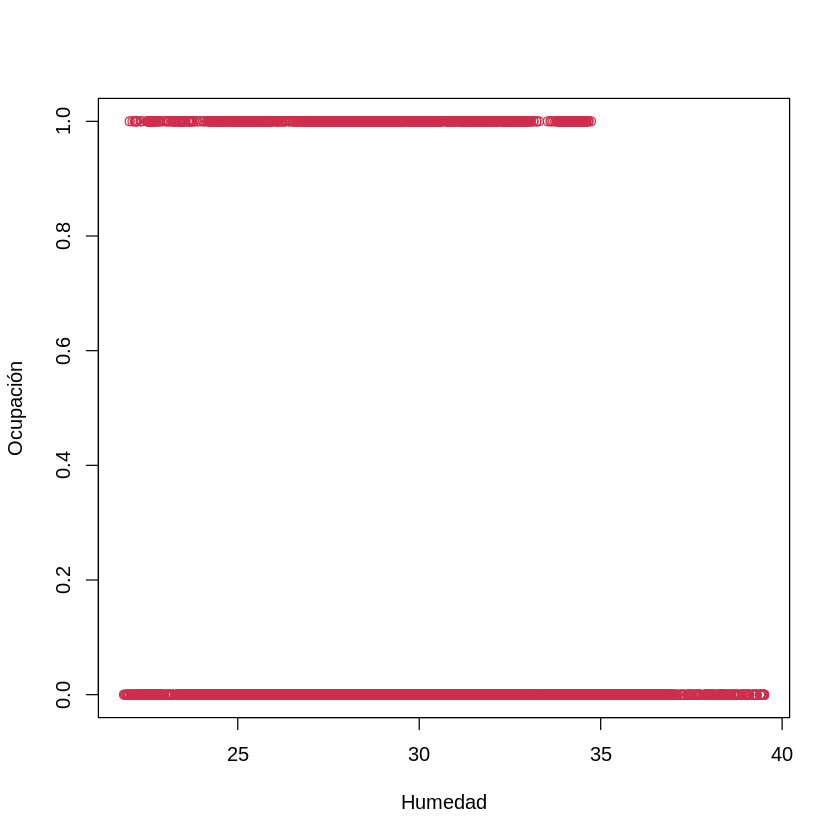

In [31]:
plot(datos$Humidity,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Humedad",
     col = "#CF2D4C")

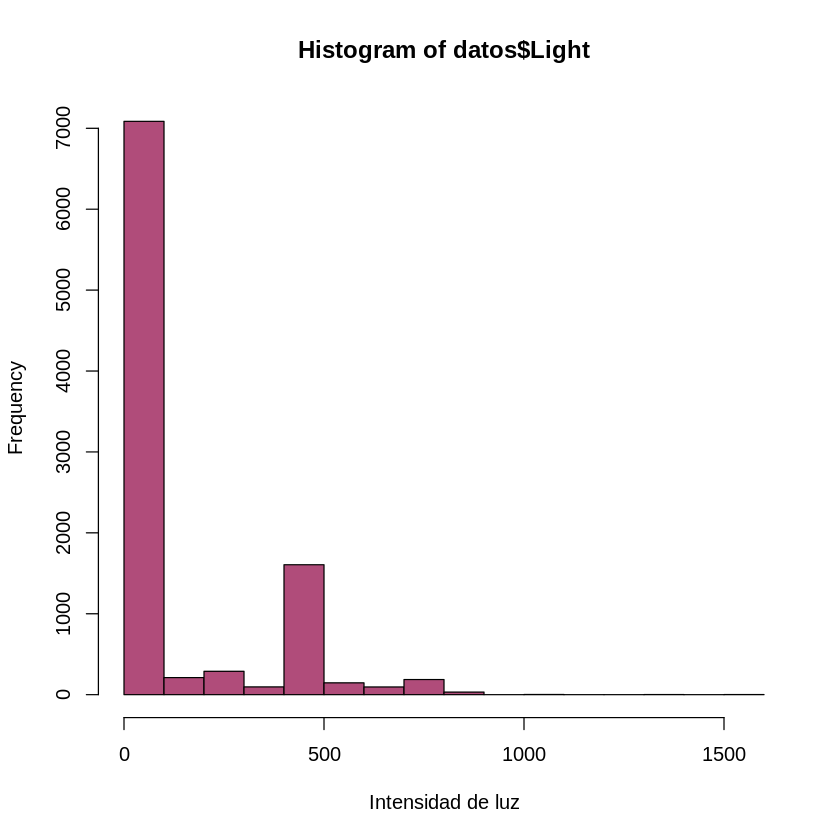

In [32]:
hist(datos$Light,
     xlab = "Intensidad de luz",
     col = "#B04C7A")

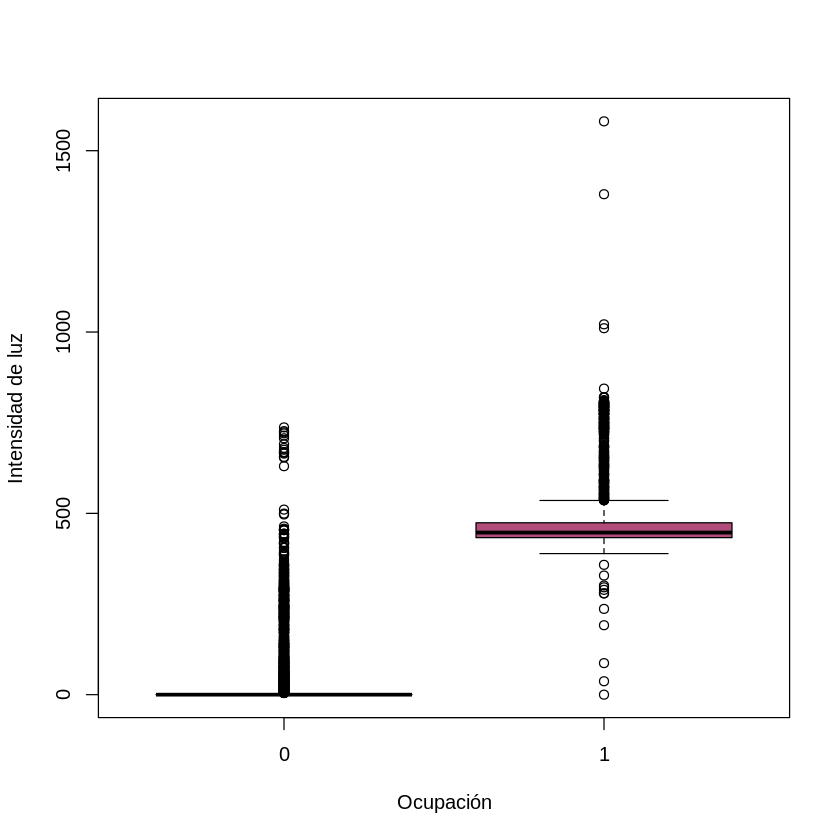

In [48]:
boxplot(datos$Light ~ datos$Occupancy,
        ylab = "Intensidad de luz",
        xlab = "Ocupación",
        col = "#B04C7A")

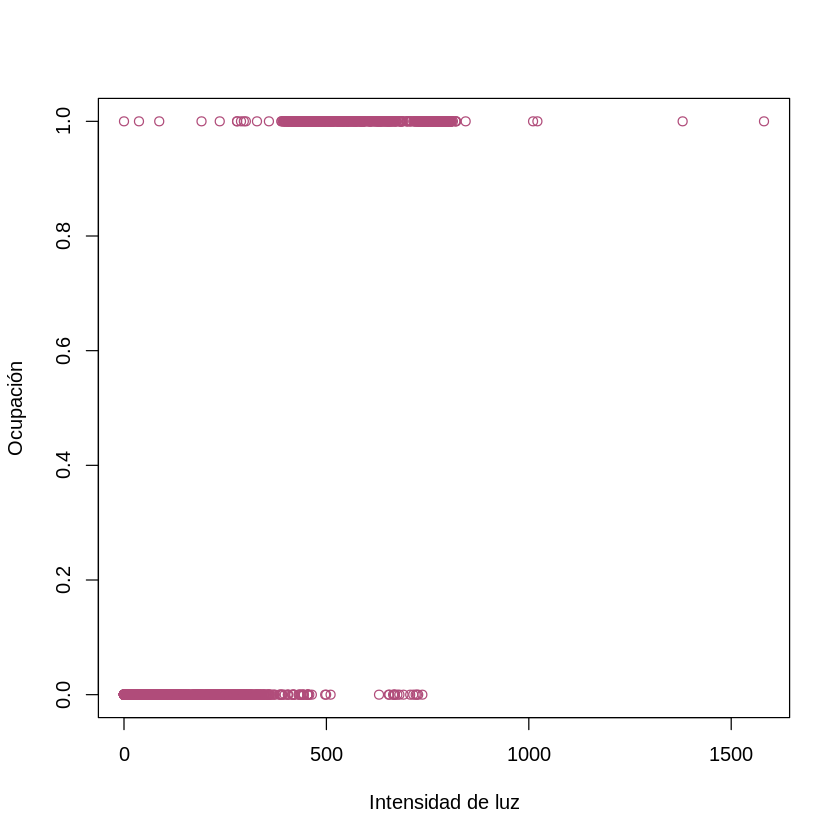

In [34]:
plot(datos$Light,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Intensidad de luz",
     col = "#B04C7A")

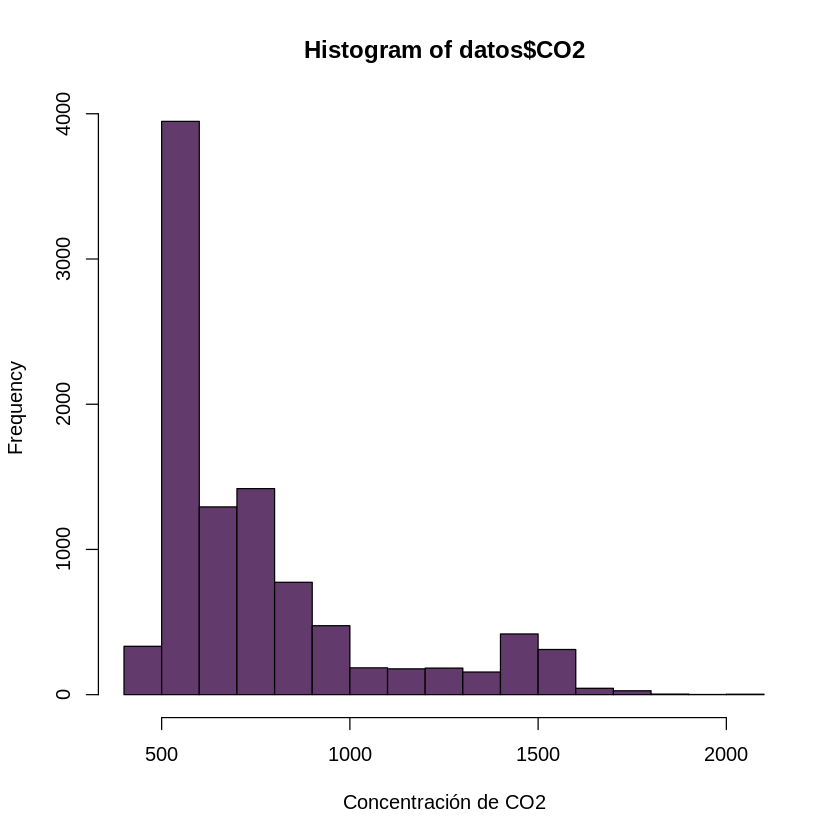

In [35]:
hist(datos$CO2,
     xlab = "Concentración de CO2",
     col = "#623A6C")

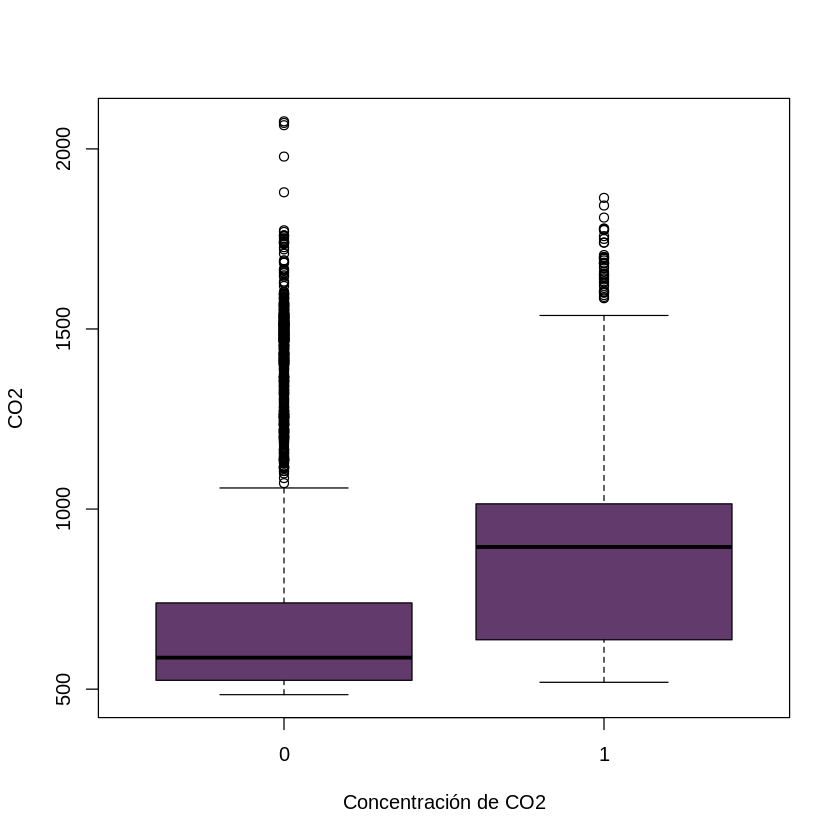

In [49]:
boxplot(datos$CO2 ~ datos$Occupancy,
        ylab = "CO2",
        xlab = "Concentración de CO2",
        col = "#623A6C")

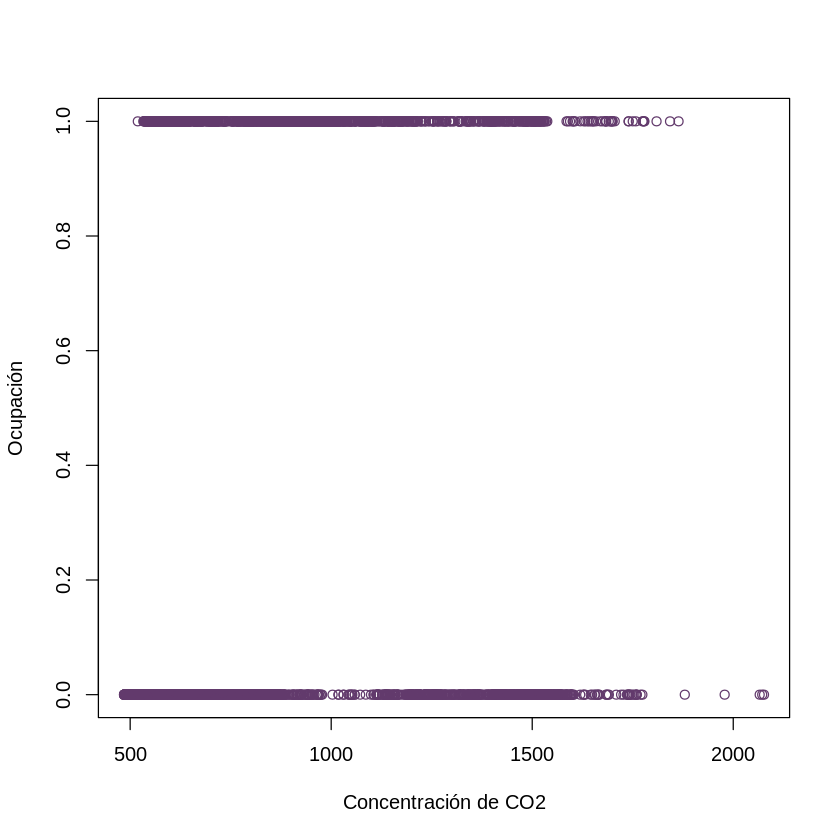

In [37]:
plot(datos$CO2,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Concentración de CO2",
     col = "#623A6C")

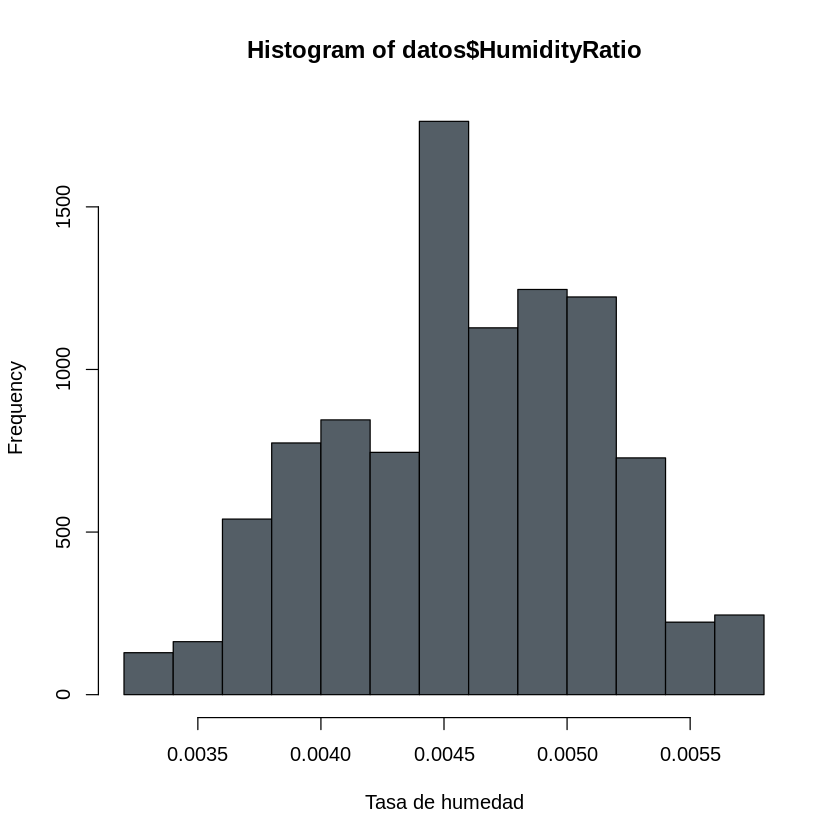

In [38]:
hist(datos$HumidityRatio,
     xlab = "Tasa de humedad",
     col = "#545E66")

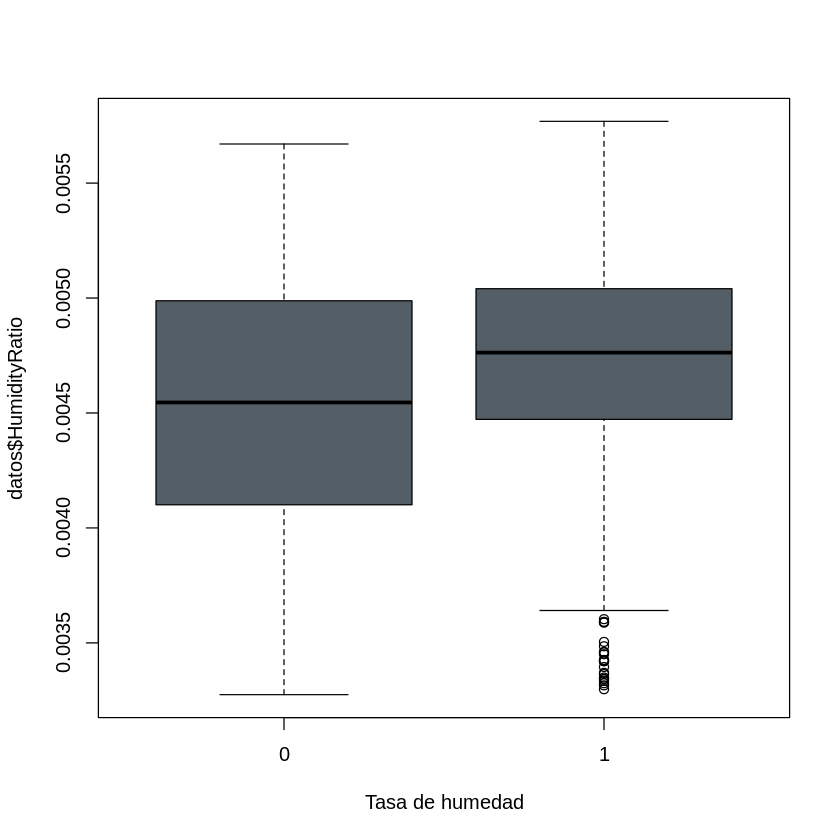

In [39]:
boxplot(datos$HumidityRatio ~ datos$Occupancy,
        ylab = "Tasa de humedad",
        xlab = "Tasa de humedad",
        col = "#545E66")

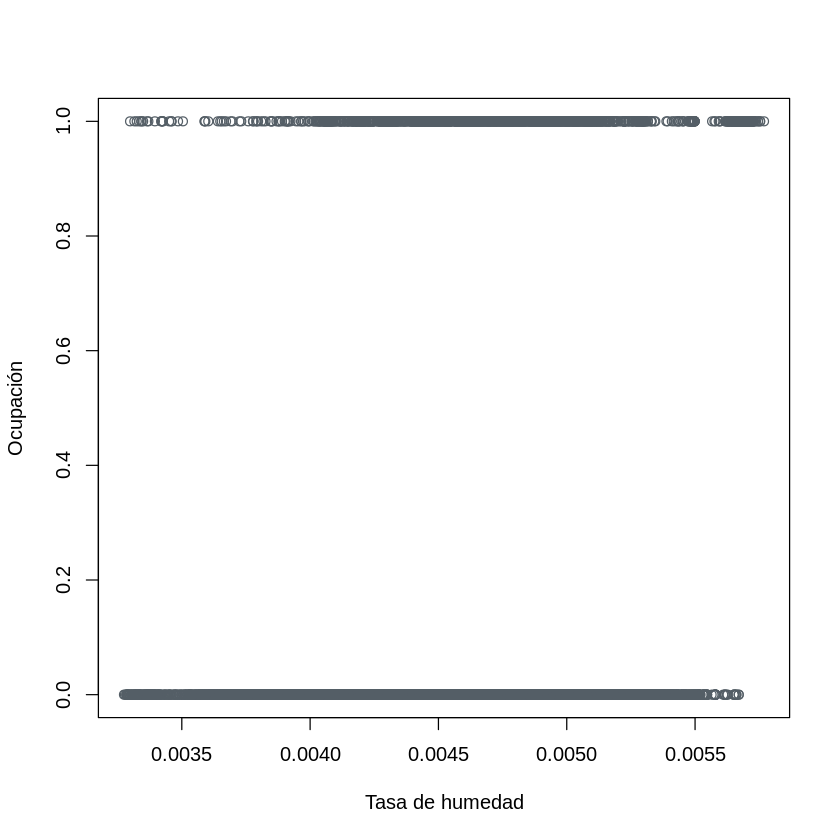

In [40]:
plot(datos$HumidityRatio,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Tasa de humedad",
     col = "#545E66")